In [74]:
import os
import re
import cv2
import numpy as np
from matplotlib import pyplot as plt
import easyocr
from PIL import Image as PImage
from pathlib import Path
from sklearn.metrics import accuracy_score

%matplotlib inline

In [ ]:
IMG_PATH = "data/test/img/"

In [154]:
def load_and_preprocess_image(path):
    img = cv2.imread(path, 0)

    # find the white rectangle
    th = img.copy()
    th[th < 25] = 0

    bbox = np.where(th > 0)
    y0 = bbox[0].min()
    y1 = bbox[0].max()
    x0 = bbox[1].min()
    x1 = bbox[1].max()

    # crop the region of interest (ROI)
    img = img[y0:y1, x0:x1]

    # histogram equalization
    equ = cv2.equalizeHist(img)
    # Gaussian blur
    blur = cv2.GaussianBlur(equ, (5, 5), 1)

    # manual thresholding
    th2 = 90 # this threshold might vary!
    equ[equ >= th2] = 255
    equ[equ < th2]  = 0
    
    return equ

In [155]:
def loadImages(path):
    # return array of images
    imagesList = os.listdir(path)
    image_names = []
    loadedImages = []
    for image in imagesList:
        img = load_and_preprocess_image(path + image)
        loadedImages.append(np.array(img))
        image_names.append(image.split('.')[0])
    
    return loadedImages, image_names


imgs, img_names = loadImages(IMG_PATH)

In [193]:
def filter_text(ocr_result):
    # регулярное выражение для валидации номера
    plate_pattern = r'[A-Z]\d{3}[A-Z]{2}\d{2,3}'
    # допустимые символы
    accepted_symbols = r'[^ABCEHKMOPTXY1234567890]'
    
    plates = [] 
    res = ''
    for result in ocr_result:
        if plates:
            plates.append(plates[-1] + result[1])
        else:
            plates.append(result[1])
    
    for plate in plates:
        plate = plate.replace(' ', '')
        plate = plate.upper()
        plate = re.sub(accepted_symbols, '', plate)
        if len(plate) >= 8:
            prefix = plate[:1].replace('0', 'O')
            digits = plate[1:4].replace('O', '0')
            postfix = plate[4:6].replace('0', 'O')
            region = plate[6:].replace('O', '0')
            plate = f'{prefix}{digits}{postfix}{region}'
#         print(plate)
        match = re.search(plate_pattern, plate)
        if match:
            res = match.group(0)             
            
    return res

[([[32, 4], [364, 4], [364, 78], [32, 78]], 'AO01BP54', 0.6491412974410675)] A001BP54
A001BP54
Wall time: 1.73 s


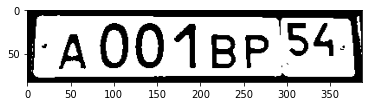

In [194]:
%%time
reader = easyocr.Reader(['en'])
for img, img_name in zip(imgs, img_names):
    ocr_result = reader.readtext(img)
    print(ocr_result, img_name)
    print(filter_text(ocr_result))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    break

[([[19, 9], [237, 9], [237, 49], [19, 49]], 'AOOZkx 152', 0.5874147463020242)]



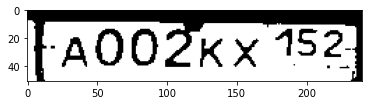

In [195]:
img = imgs[2]
ocr_result = reader.readtext(img)
print(ocr_result)
print(filter_text(ocr_result))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [196]:
%%time
ocr_texts = []
reader = easyocr.Reader(['en'], gpu=True)
for img, img_name in zip(imgs, img_names):        
    ocr_result = reader.readtext(img)
    text = filter_text(ocr_result)
    ocr_texts.append(text)

Wall time: 1min 4s


In [197]:
len(img_names), len(ocr_texts)

(2845, 2845)

In [198]:
accuracy_score(img_names, ocr_texts)

0.1827768014059754

In [199]:
ocr_texts

['A001BP54',
 '',
 '',
 '',
 '',
 '',
 'A004OE23',
 'A005AX26',
 'A006AA10',
 '',
 '',
 'A007CT163',
 'A009XX123',
 '',
 '',
 '',
 'A012AA05',
 '',
 '',
 'A019AX122',
 'A020AA06',
 '',
 'A020KE123',
 '',
 '',
 'A021XH86',
 'A025EE73',
 '',
 '',
 'A032AX790',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'A050AA77',
 '',
 '',
 '',
 '',
 '',
 'A061MA10',
 '',
 'A062TX716',
 '',
 'A063YE750',
 '',
 'A069HO51',
 '',
 '',
 'A076AE39',
 'A078AA10',
 '',
 '',
 'A080BO197',
 'A080TA192',
 '',
 '',
 '',
 '',
 '',
 'A097BK12',
 '',
 'A102BY51',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'A121OO51',
 'A129XY795',
 '',
 '',
 'A134XA37',
 'A140TB174',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'A159OT777',
 '',
 '',
 '',
 'A162OA34',
 '',
 'A167KH92',
 '',
 '',
 'A176AT98',
 'A179BT92',
 'A179KP82',
 '',
 '',
 'A201AA95',
 '',
 '',
 'A212TK15',
 '',
 '',
 'A229TY35',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 '',
 'A278OO92',
 'A279CP35',
 '',
 'A286AP35',
 'A288EX73',
 'A293YO199',
 '',
 'A298KP91',
 '',
 '',
 '',
 '',
 ''